In [ ]:
# Multiple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("car data (3) (1).csv")
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
df.isnull().sum().any()

False

In [23]:
df["Age"]=2025-df["Year"]

In [31]:
# df.drop(columns="age",inplace=True)

In [35]:
df.drop(columns="Year",inplace=True)

In [37]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [ ]:
# Now we check the coreelation between columns it is applied on only numerical quantity..

In [45]:
l=[]
for i in df:
    if df[i].dtype!="object":
        l.append(i)
print(l)    

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age']


In [49]:
df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age']].corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [ ]:
# Another approach is ...

In [61]:
num=df.select_dtypes(include=np.number)
num

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
0,3.35,5.59,27000,0,11
1,4.75,9.54,43000,0,12
2,7.25,9.85,6900,0,8
3,2.85,4.15,5200,0,14
4,4.60,6.87,42450,0,11
...,...,...,...,...,...
296,9.50,11.60,33988,0,9
297,4.00,5.90,60000,0,10
298,3.35,11.00,87934,0,16
299,11.50,12.50,9000,0,8


In [63]:
num.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


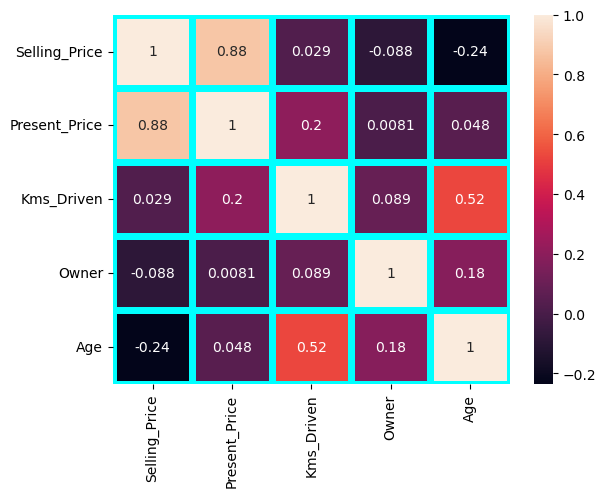

In [95]:

sns.heatmap(num.corr(),annot=True,linecolor="cyan",linewidth=5);

In [97]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [ ]:
# convert the data into numerical..

In [99]:
for i in df:
    if df[i].dtype=="object":
        print(i,'.....',df[i].nunique())

Car_Name ..... 98
Fuel_Type ..... 3
Seller_Type ..... 2
Transmission ..... 2


In [105]:
for i in df.select_dtypes(include="object"):
    print(i,'.....',df[i].nunique())


Car_Name ..... 98
Fuel_Type ..... 3
Seller_Type ..... 2
Transmission ..... 2


In [ ]:
# categorical data is 2 types:
#1 is nominal....(one hot encoding)
#2 is ordinol...(label encoding)

In [107]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [109]:
df["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [111]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

# Why use it?
Many machine learning algorithms require numeric inputs. Categorical text fields like 'Red', 'Blue', 'Green' must be turned into numbers. One-hot encoding is a standard technique, and get_dummies() handles it simply.

In [190]:
df1=pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"],drop_first=True)
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,11,False,True,False,True
1,sx4,4.75,9.54,43000,0,12,True,False,False,True
2,ciaz,7.25,9.85,6900,0,8,False,True,False,True
3,wagon r,2.85,4.15,5200,0,14,False,True,False,True
4,swift,4.60,6.87,42450,0,11,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,9,True,False,False,True
297,brio,4.00,5.90,60000,0,10,False,True,False,True
298,city,3.35,11.00,87934,0,16,False,True,False,True
299,city,11.50,12.50,9000,0,8,True,False,False,True


In [ ]:
# hum car_name lme k technique ;ga skte hain mean target encoding...

In [ ]:
# 300 row hai 98 unique hai .hum kya unique kar ka average le lenge jaise sbhi swift car ka average sabhi alto car ka average aise hi sbhi cars ka

In [117]:
# df["Car_Name"].value_counts()

In [123]:
df2=df.groupby(["Car_Name"])["Selling_Price"].mean().reset_index().rename(columns={"Selling_Price":"car"})
df2.head()

,Car_Name,car
0,800,0.35
1,Activa 3g,0.31
2,Activa 4g,0.40
3,Bajaj ct 100,0.18
4,Bajaj Avenger 150,0.75


In [127]:
df3=pd.merge(df1,df2,how="inner",on="Car_Name")
df3

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car
0,ritz,3.35,5.59,27000,0,11,False,True,False,True,2.862500
1,sx4,4.75,9.54,43000,0,12,True,False,False,True,3.158333
2,ciaz,7.25,9.85,6900,0,8,False,True,False,True,7.472222
3,wagon r,2.85,4.15,5200,0,14,False,True,False,True,2.512500
4,swift,4.60,6.87,42450,0,11,True,False,False,True,4.540000
...,...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,9,True,False,False,True,7.419231
297,brio,4.00,5.90,60000,0,10,False,True,False,True,4.745000
298,city,3.35,11.00,87934,0,16,False,True,False,True,7.419231
299,city,11.50,12.50,9000,0,8,True,False,False,True,7.419231


In [129]:
df3.drop(columns="Car_Name",inplace=True)

In [131]:
df3

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car
0,3.35,5.59,27000,0,11,False,True,False,True,2.862500
1,4.75,9.54,43000,0,12,True,False,False,True,3.158333
2,7.25,9.85,6900,0,8,False,True,False,True,7.472222
3,2.85,4.15,5200,0,14,False,True,False,True,2.512500
4,4.60,6.87,42450,0,11,True,False,False,True,4.540000
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,9,True,False,False,True,7.419231
297,4.00,5.90,60000,0,10,False,True,False,True,4.745000
298,3.35,11.00,87934,0,16,False,True,False,True,7.419231
299,11.50,12.50,9000,0,8,True,False,False,True,7.419231


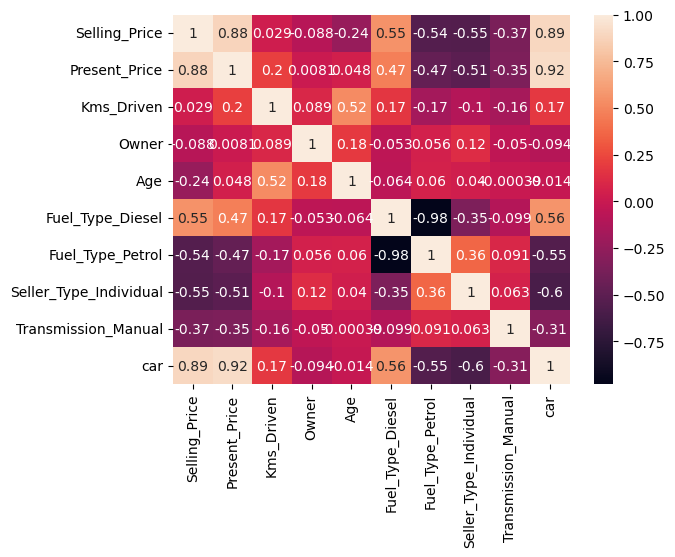

In [135]:
sns.heatmap(df3.corr(),annot=True);

In [137]:
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,11,False,True,False,True
1,sx4,4.75,9.54,43000,0,12,True,False,False,True
2,ciaz,7.25,9.85,6900,0,8,False,True,False,True
3,wagon r,2.85,4.15,5200,0,14,False,True,False,True
4,swift,4.60,6.87,42450,0,11,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,0,9,True,False,False,True
297,brio,4.00,5.90,60000,0,10,False,True,False,True
298,city,3.35,11.00,87934,0,16,False,True,False,True
299,city,11.50,12.50,9000,0,8,True,False,False,True


In [139]:
x=df3.drop(columns=["Selling_Price"])
y=df3["Selling_Price"]

In [147]:
from sklearn.preprocessing import StandardScaler

In [149]:
st=StandardScaler()
x_scaled=st.fit_transform(x)
x_scaled    #v range is -3 standard deviation to +3 standard deviation

array([[-0.23621461, -0.25622446, -0.17450057, ..., -0.73728539,
         0.39148015, -0.39671534],
       [ 0.22150462,  0.1559105 , -0.17450057, ..., -0.73728539,
         0.39148015, -0.33147079],
       [ 0.25742689, -0.77396901, -0.17450057, ..., -0.73728539,
         0.39148015,  0.61993571],
       ...,
       [ 0.39068691,  1.31334003, -0.17450057, ..., -0.73728539,
         0.39148015,  0.60824871],
       [ 0.56450434, -0.7198763 , -0.17450057, ..., -0.73728539,
         0.39148015,  0.60824871],
       [-0.20029235, -0.81095812, -0.17450057, ..., -0.73728539,
         0.39148015,  0.01846057]])

In [151]:
from sklearn.model_selection import train_test_split

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [155]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(240, 9) (240,)
(61, 9) (61,)


In [157]:
from sklearn.linear_model import LinearRegression

In [159]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [163]:
lr.coef_

array([ 2.69215621, -0.20729746,  0.09929783, -1.17598968,  0.49571499,
       -0.02234284, -0.37628188, -0.59221912,  1.40181488])

In [165]:
lr.intercept_

4.6953172944868715

In [177]:
from sklearn.metrics import r2_score

In [173]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [179]:
r2_score(y_train,y_pred_train)

0.8915572561110516

In [181]:
r2_score(y_test,y_pred_test)

0.9035789494878803

In [195]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled now has ~zero means and unit stds per column:
# X_scaled.mean(axis=0) ≈ [0., 0., 0.]
# X_scaled.std(axis=0) ≈ [1., 1., 1.]


In [202]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

# Hold out method

In [222]:
from sklearn.model_selection import train_test_split
x=[10,20,30,40,50,60,70,80,90,100]
train,test=train_test_split(x,test_size=0.3,)
print(train)
print(test)

[50, 30, 100, 70, 40, 80, 60]
[10, 90, 20]


In [266]:
from sklearn.model_selection import train_test_split
x=["yes","yes","yes","yes","No","yes","yes","No","yes"]
train,test=train_test_split(x,test_size=0.2)
print(train)
print(test)

['yes', 'yes', 'No', 'yes', 'yes', 'No', 'yes']
['yes', 'yes']


# LOOV
#Leaveone out validation

In [284]:
from sklearn.model_selection import LeaveOneOut
a=[0,1,2,3,4,5,6,7,8,9]
l=LeaveOneOut()
for train,test in l.split(a):
    print("%s %s"%(train,test))
    # print("Train data",train,"Test data",test) or 

Train data [1 2 3 4 5 6 7 8 9] Test data [0]
Train data [0 2 3 4 5 6 7 8 9] Test data [1]
Train data [0 1 3 4 5 6 7 8 9] Test data [2]
Train data [0 1 2 4 5 6 7 8 9] Test data [3]
Train data [0 1 2 3 5 6 7 8 9] Test data [4]
Train data [0 1 2 3 4 6 7 8 9] Test data [5]
Train data [0 1 2 3 4 5 7 8 9] Test data [6]
Train data [0 1 2 3 4 5 6 8 9] Test data [7]
Train data [0 1 2 3 4 5 6 7 9] Test data [8]
Train data [0 1 2 3 4 5 6 7 8] Test data [9]


# K-fold

In [282]:
from sklearn.model_selection import KFold
x=["a","b","c","d","e","f","g","h","i","j"]
kf=KFold(n_splits=5,shuffle=False)
for train,test in kf.split(x):
    print("Train data",train,"Test data",test)
    # print("%s %s"%(train,test)) or 


Train data [2 3 4 5 6 7 8 9] Test data [0 1]
Train data [0 1 4 5 6 7 8 9] Test data [2 3]
Train data [0 1 2 3 6 7 8 9] Test data [4 5]
Train data [0 1 2 3 4 5 8 9] Test data [6 7]
Train data [0 1 2 3 4 5 6 7] Test data [8 9]
